In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


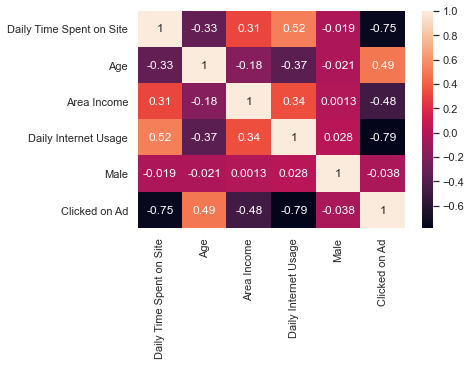

In [6]:
sns.heatmap(ad_data.corr(), annot=True)

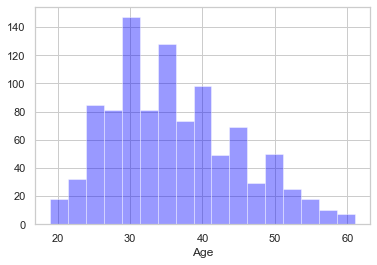

In [7]:
sns.distplot(ad_data['Age'], kde=False, color='blue')

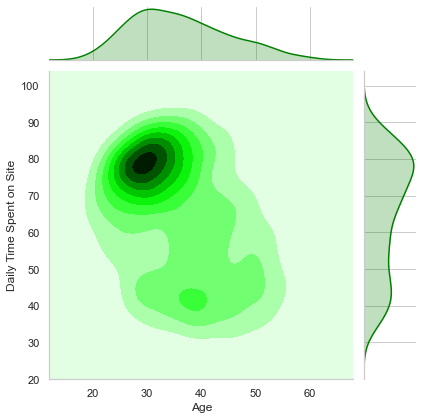

In [84]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='green')

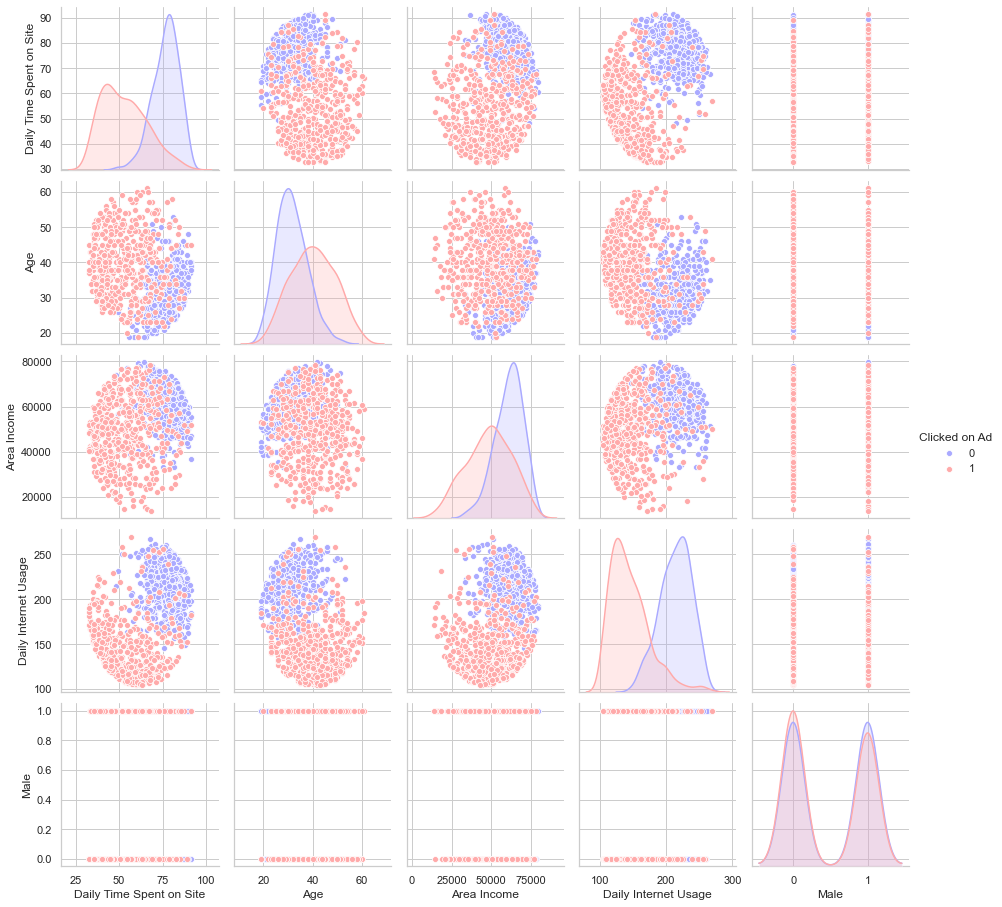

In [11]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

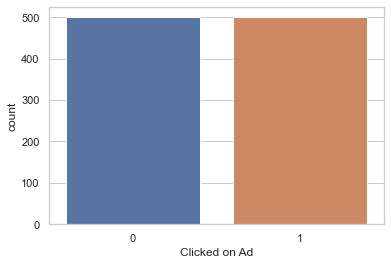

In [15]:
sns.countplot(x='Clicked on Ad', data=ad_data)

In [17]:
ad_data['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

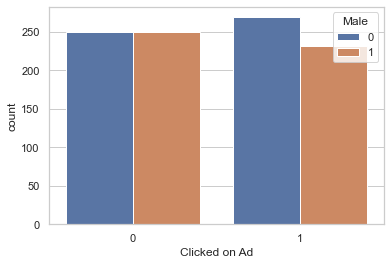

In [24]:
sns.countplot(x='Clicked on Ad', hue='Male',data=ad_data)

In [27]:
ad_data[(ad_data['Clicked on Ad']==0) & (ad_data['Male'] == 0)]['Clicked on Ad'].count()

250

In [28]:
ad_data[(ad_data['Clicked on Ad']==1) & (ad_data['Male'] == 0)]['Clicked on Ad'].count()

269

In [29]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [32]:
ad_data['City'].value_counts()

Williamsport        3
Lisamouth           3
Wrightburgh         2
Pamelamouth         2
Port Juan           2
                   ..
Lesliefort          1
Teresahaven         1
North Johnside      1
Lovemouth           1
Port Melissaberg    1
Name: City, Length: 969, dtype: int64

In [33]:
ad_data['Country'].value_counts()

France            9
Czech Republic    9
Senegal           8
Turkey            8
Peru              8
                 ..
Lesotho           1
Kiribati          1
Bermuda           1
Germany           1
Aruba             1
Name: Country, Length: 237, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
labelencoder = LabelEncoder()

In [38]:
city = labelencoder.fit_transform(ad_data['City'])
country = labelencoder.fit_transform(ad_data['Country'])

In [41]:
ad_data['City'] = city
ad_data['Country'] = country

In [42]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,961,0,215,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,903,1,147,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,111,0,184,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,939,1,103,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,805,0,96,2016-06-03 03:36:18,0


In [43]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   int64  
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   int32  
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 74.3+ KB


In [46]:
ad_data['Timestamp'].value_counts()

2016-07-19 12:05:58    1
2016-03-09 02:07:17    1
2016-01-01 21:58:55    1
2016-02-14 17:05:15    1
2016-06-29 01:19:21    1
                      ..
2016-05-21 01:36:16    1
2016-07-16 14:13:54    1
2016-06-02 22:16:08    1
2016-06-17 09:38:22    1
2016-05-05 09:28:36    1
Name: Timestamp, Length: 1000, dtype: int64

In [47]:
ad_data['Timestamp'].nunique()

1000

In [49]:
ad_data.drop(['Ad Topic Line', 'Timestamp'], axis=1, inplace=True)

In [59]:
ad_data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
995,72.97,30,71384.57,208.58,126,1,116,1
996,51.30,45,67782.17,134.42,488,1,26,1
997,51.63,51,42415.72,120.37,798,1,140,1
998,55.55,19,41920.79,187.95,935,0,85,0
999,45.01,26,29875.80,178.35,744,0,28,1


In [53]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country', 'Clicked on Ad'],
      dtype='object')

In [54]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'City', 'Male', 'Country']]
y = ad_data['Clicked on Ad']

In [57]:
X.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
995,72.97,30,71384.57,208.58,126,1,116
996,51.30,45,67782.17,134.42,488,1,26
997,51.63,51,42415.72,120.37,798,1,140
998,55.55,19,41920.79,187.95,935,0,85
999,45.01,26,29875.80,178.35,744,0,28


In [58]:
y.tail()

995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
703,77.65,28,66198.66,208.01,617,0,221
311,69.74,49,66524.80,243.37,33,0,95
722,39.47,43,65576.05,163.48,101,1,220
629,73.94,26,55411.06,236.15,433,1,101
0,68.95,35,61833.90,256.09,961,0,215


In [64]:
y_train.head()

703    0
311    0
722    1
629    0
0      0
Name: Clicked on Ad, dtype: int64

In [65]:
X_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
521,63.26,29,54787.37,120.46,145,1,65
737,71.23,52,41521.28,122.59,198,0,203
740,43.63,38,61757.12,135.25,212,1,111
660,42.04,49,67323.00,182.11,485,0,171
411,78.68,29,66225.72,208.05,418,0,102


In [78]:
X_test.count()

Daily Time Spent on Site    330
Age                         330
Area Income                 330
Daily Internet Usage        330
City                        330
Male                        330
Country                     330
dtype: int64

In [79]:
y_test.count()

330

In [73]:
y_test.head(10)

521    1
737    1
740    1
660    1
411    0
678    0
626    0
513    1
859    0
136    1
Name: Clicked on Ad, dtype: int64

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [69]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [71]:
prediction = logmodel.predict(X_test)

In [72]:
prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       162
           1       0.95      0.85      0.90       168

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
print(confusion_matrix(y_test, prediction))

[[155   7]
 [ 26 142]]


In [80]:
# Accuracy
(155+142)/(155+7+26+142)

0.9

In [81]:
# error
(7+26)/(155+7+26+142)

0.1